# Lead Score Case Study Based On Logistic Regression


## Lead Score Case Study - Logistic Regression

Following steps will be taken.

1. Reading,understanding and cleaning the data
2. Data visualisation(EDA)
3. Data preparation
4. Splitting the data into train and test sets
5. Building our model
6. Model prediction and evaluation

# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step1.1 Reading the Dataset

In [2]:
leads_df=pd.read_csv("Leads.csv")

In [643]:
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [644]:
#check shape of data
leads_df.shape

(9240, 37)

In [645]:
#Check Basic Information
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [646]:
#Check statistical summary
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [647]:
#check columns name
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [648]:
leads_df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Step 1.2 Data Cleaning

### it is asked on the given dataset tp handle select in some categorical column


In [649]:
#check some categorical column to find select count in them.
leads_df["City"].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [650]:
leads_df["Specialization"].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [651]:
leads_df["Lead Profile"].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

### here it can be observed that


In [652]:
#replace select with np.nan in whole dataframe
leads_df.replace("Select",np.NaN,inplace=True)

In [653]:
leads_df.City.value_counts(dropna=False) # by default value_counts doesnot count NaN values.

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [654]:
leads_df.Specialization.value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [655]:
leads_df["Lead Profile"].value_counts(dropna=False)

Lead Profile
NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [656]:
#Find Null Value Percentage in each column
leads_df.index

RangeIndex(start=0, stop=9240, step=1)

In [657]:
round(leads_df.isna().sum()/len(leads_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#examining the data in categorical colmns to validate skewness
1.Leads Origin
2.Leads Source
3.Country
4.speicialization
5.What is your current occupation
6.City

#### Now examining the data in categorical columns to validate skewness
1. Lead Origin
2. Lead Source
3. Country
4. Specialization                                   
5. What is your current occupation
6. City

In [4]:
#Now examining the data in categorical column to validate skewness
categorical_columns=['Lead Origin','Lead Source','Country','Specialization','What is your current occupation',"City"]
for x in categorical_columns:
    print("Column -"+ x)
    print("------------------------")
    print(round(leads_df[x].value_counts()/len(leads_df[x]),2)*100)
    print("------------------------")
    print("\n")

Column -Lead Origin
------------------------
Lead Origin
Landing Page Submission    53.0
API                        39.0
Lead Add Form               8.0
Lead Import                 1.0
Quick Add Form              0.0
Name: count, dtype: float64
------------------------


Column -Lead Source
------------------------
Lead Source
Google               31.0
Direct Traffic       28.0
Olark Chat           19.0
Organic Search       12.0
Reference             6.0
Welingak Website      2.0
Referral Sites        1.0
Facebook              1.0
bing                  0.0
google                0.0
Click2call            0.0
Press_Release         0.0
Social Media          0.0
Live Chat             0.0
youtubechannel        0.0
testone               0.0
Pay per Click Ads     0.0
welearnblog_Home      0.0
WeLearn               0.0
blog                  0.0
NC_EDM                0.0
Name: count, dtype: float64
------------------------


Column -Country
------------------------
Country
India                

### Ploting graphs for all categorical columns

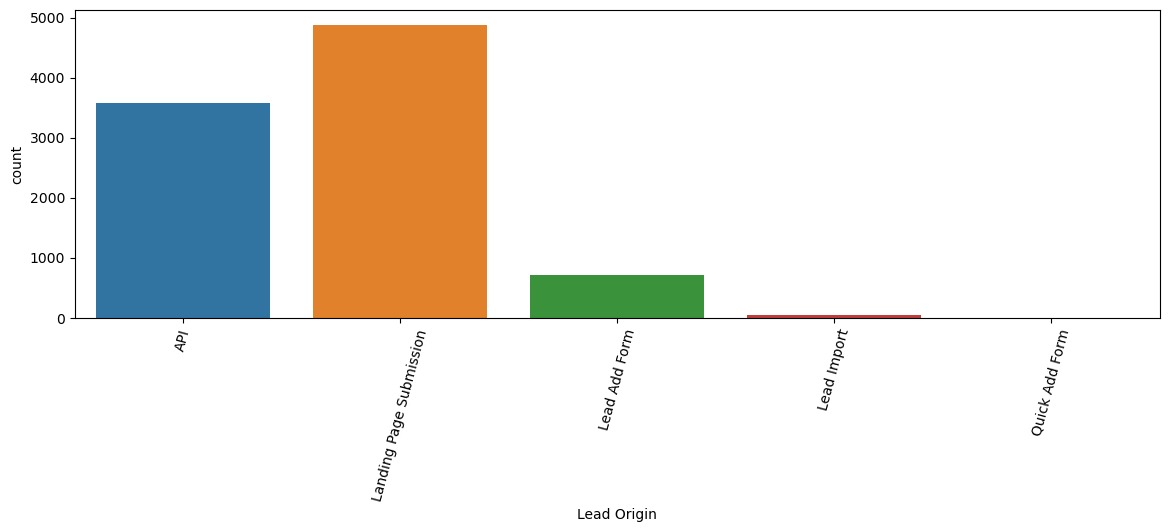

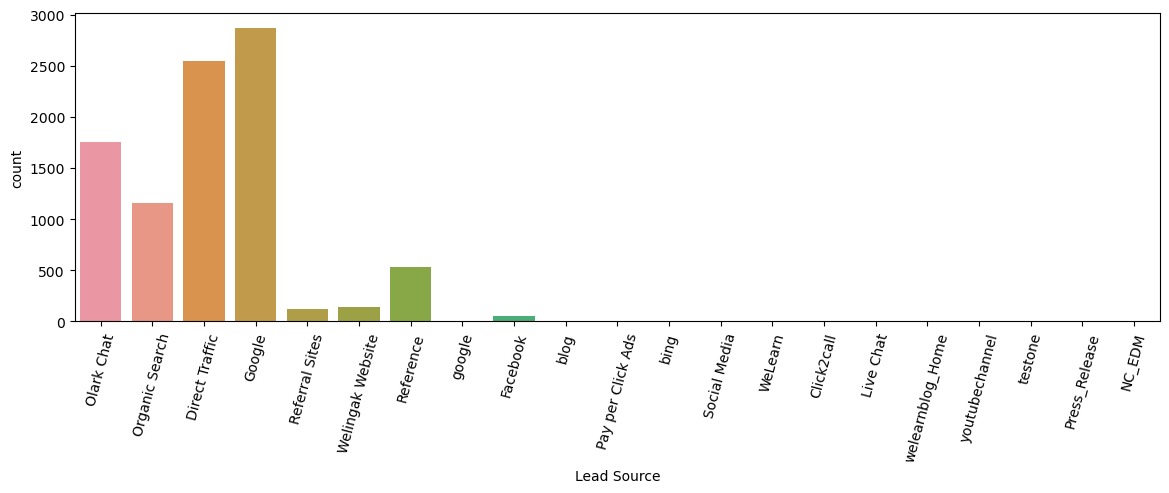

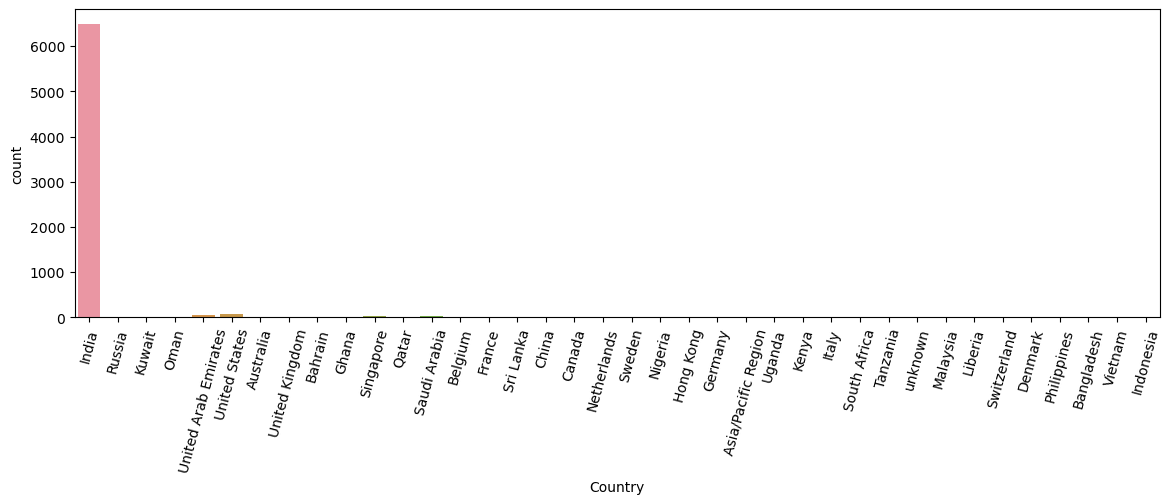

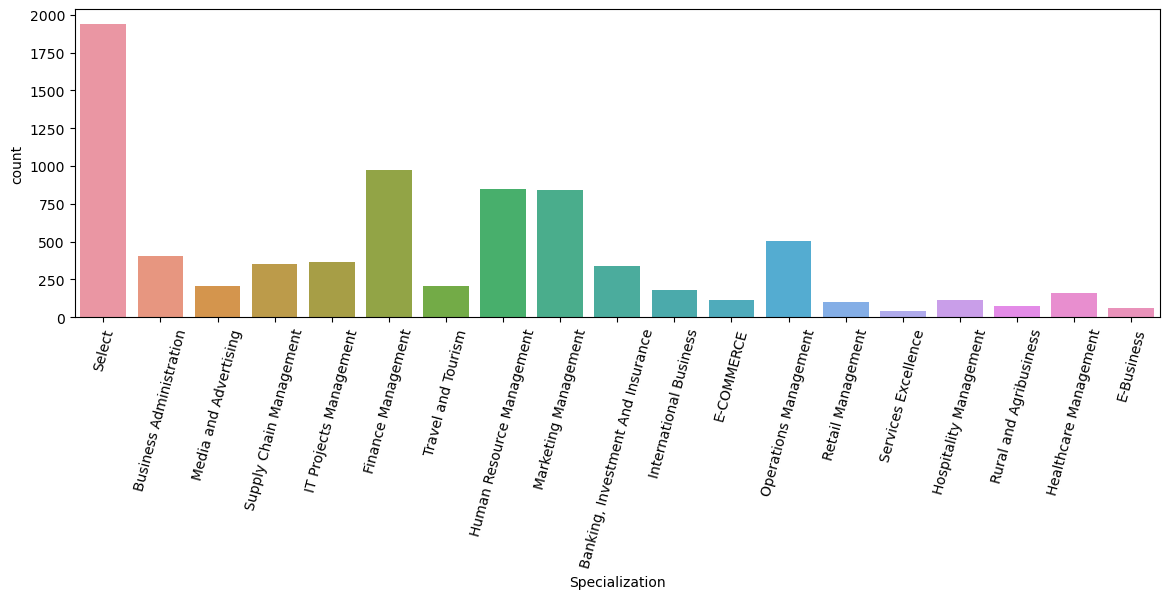

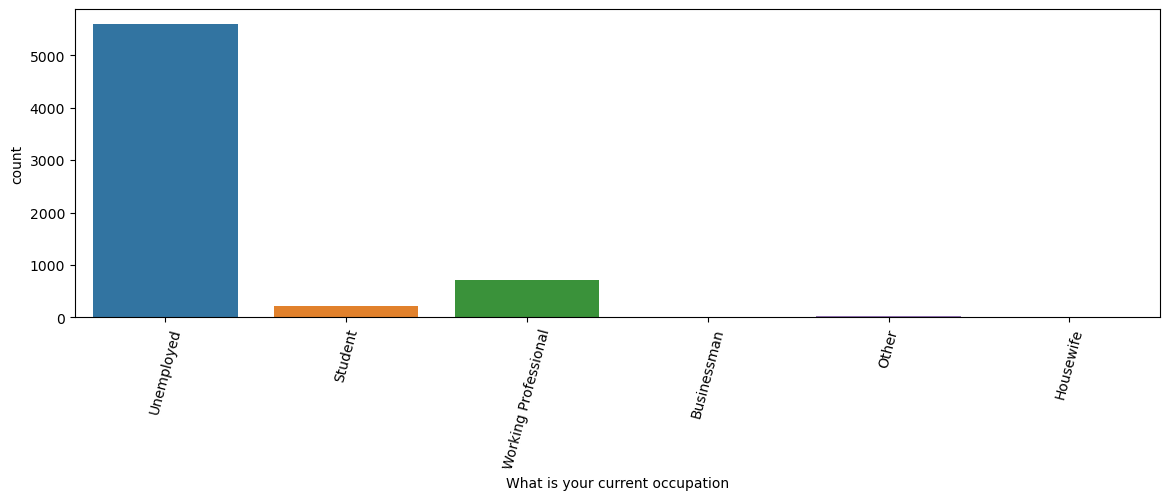

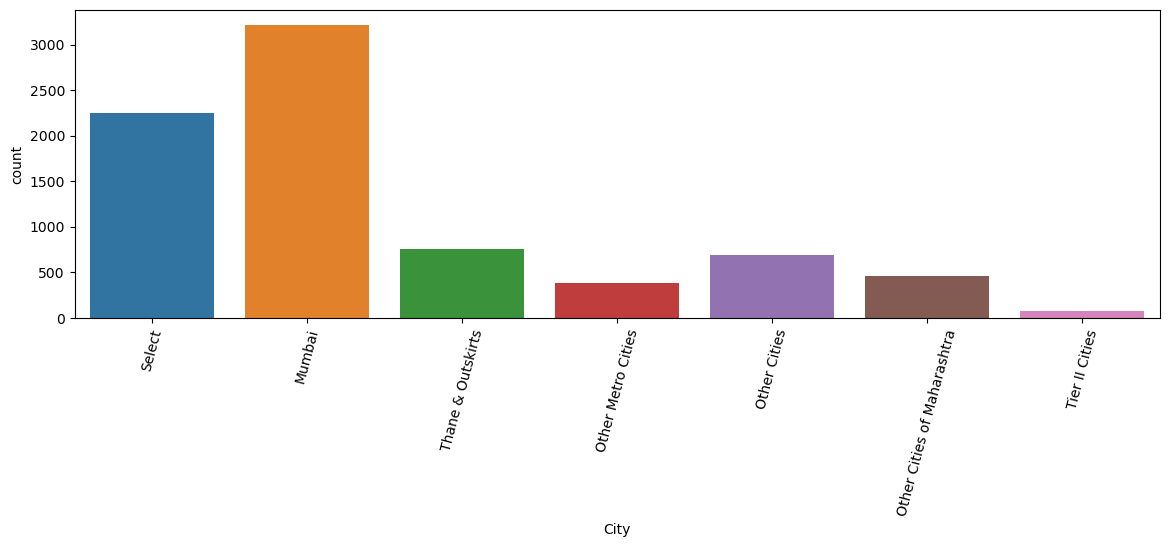

In [5]:
for col in categorical_columns:
    plt.figure(figsize=[14,4])
    sns.countplot(x=col,data=leads_df)
    plt.xticks(rotation=75)
    plt.show()

### Observation

 1.in column lead origin,percentage of value counts of most the categories Lead Add Form,Lead Import and Quick Add Form are low so we have decided to club them in "Lead Import/Add Form" in newly derived column

2.In column Lead Source we can see other than top four categories by looking both value count and chart are very low in percentage so we have decided to club rest of the categories under others in newly derived column..

3.Country column is highly skewable by observing plot and value_counts which leads to data imbalance ,here it should be drop for 
better analysis

4.Columns City and Specilization have approx 40% null values.we will drop these columns.

### once we create newly derived columns,we will drop the existing columns from the data frames

In [660]:
def der_lead_origin(x):
    if x in("Lead Add Form","Lead Import","Quick Add Form"):
        return("Lead Import/Add Form")
    else:
        return(x)

def der_source_origin(x):
    if x not in("Google","Direct Traffic","Olark Chat","Organic Search"):
        return("Others")
    else:
        return(x)

In [661]:
#Creating new columns Lead Origin New Lead Source New Current occupation
leads_df["Lead Origin New"]=leads_df["Lead Origin"].apply(der_lead_origin)
leads_df["Lead Source New"]=leads_df["Lead Source"].apply(der_source_origin)

In [662]:
#Printing values after
for x in ("Lead Origin New","Lead Source New"):
    print("Column -"+ x)
    print("----------------")
    print(round(leads_df[x].value_counts(dropna=False)/len(leads_df[x]),2)*100)
    print("------------------")
    print("\n")

Column -Lead Origin New
----------------
Lead Origin New
Landing Page Submission    53.0
API                        39.0
Lead Import/Add Form        8.0
Name: count, dtype: float64
------------------


Column -Lead Source New
----------------
Lead Source New
Google            31.0
Direct Traffic    28.0
Olark Chat        19.0
Organic Search    12.0
Others            10.0
Name: count, dtype: float64
------------------




#### Above we checked the the number of missing values are greater than 5 for single rows we have not found significant number of data.

## Step 1.3 Cleaning the dataset

### After examining the data as it is recommended that drop the column which are having missing values greater than 20%.

### also there are some column in dataframe like Recieve More Updates About our courses and Magazine having only single values No forall records.Hence there is no need of these column in data set.

In [663]:
missing_columns=['Country','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course',
                'Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                 'Asymmetrique Profile Score','Last Notable Activity','Last Activity','City','Specialization','Lead Origin','Lead Source',
                 'Receive More Updates About Our Courses','Magazine']

In [664]:
leads_df=leads_df.drop(missing_columns, axis=1)

In [665]:
leads_df.shape

(9240, 20)

In [666]:
#Revalidating percentage of missing value in each column
round(leads_df.isnull().sum()/len(leads_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Search                                      0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Lead Origin New                             0.0
Lead Source New                             0.0
dtype: float64

From above we can observe column TotalVisits and Page Views Per visit have 1% null values.Hence,we will impute these Null value
with their respective mean

In [667]:
#Finding means for 'TotalVisits'
leads_df.TotalVisits.mean()

3.445237833681204

In [668]:
#replace null value with mean for 'TotalVisits'
leads_df.TotalVisits.replace(np.NaN,3.44,inplace=True)

In [669]:
#Finding mean for 'Page Views Per Visit'
leads_df["Page Views Per Visit"].replace(np.NaN,2.36,inplace=True)

In [670]:
 round(leads_df.isnull().sum()/len(leads_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Search                                      0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Lead Origin New                             0.0
Lead Source New                             0.0
dtype: float64

In [671]:
#checking whether some rows have more than 5 missing values
len(leads_df[leads_df.isnull().sum(axis=1)>1].index)

0

In [672]:
#Correcting the data type for columns containing continous values

## Converting data types

### Correcting the data type of columns contining numeric continous value into discrete

In [673]:
leads_df.TotalVisits=leads_df.TotalVisits.astype("int64")
leads_df["Page Views Per Visit"]=leads_df["Page Views Per Visit"].astype("int64")

In [674]:
leads_df.TotalVisits.dtype

dtype('int64')

In [675]:
#check for conformation
leads_df[["TotalVisits"]].head(5)

TotalVisits
0            0
1            5
2            2
3            1
4            2

In [676]:
leads_df["Page Views Per Visit"].dtype

dtype('int64')

# Step 2-Data Visualization(EDA)

### Checking for outliers and their removal

In [677]:
leads_df["TotalVisits"].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

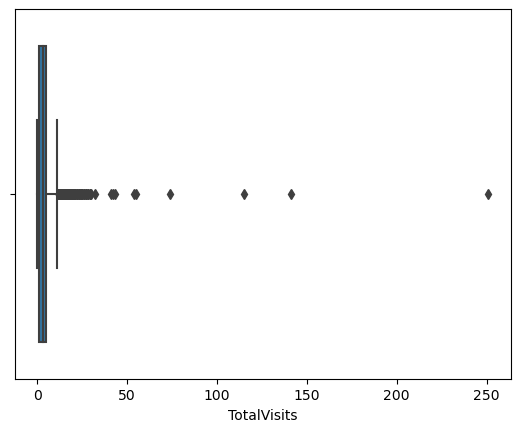

In [678]:
sns.boxplot(x=leads_df['TotalVisits'],data=leads_df)
plt.show()

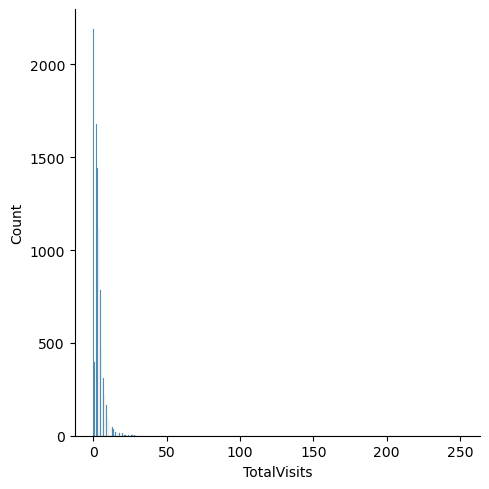

In [679]:
sns.displot(x="TotalVisits",data=leads_df,kde=False,kind='hist')
plt.show()

### it can be observed from both graph that the TotalVisit data column have high degree of skewness and outlers values

In [680]:
#Finding quantile for TotalVisits by using quantile function
leads_df.TotalVisits.quantile([0.01,0.02,0.03,0.05,0.1,0.25,0.5,0.70,0.9,0.95,0.99])

0.01     0.0
0.02     0.0
0.03     0.0
0.05     0.0
0.10     0.0
0.25     1.0
0.50     3.0
0.70     4.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [681]:
#Removing outliers from TotalVisits
leads_df=leads_df[~(leads_df["TotalVisits"]>17)]

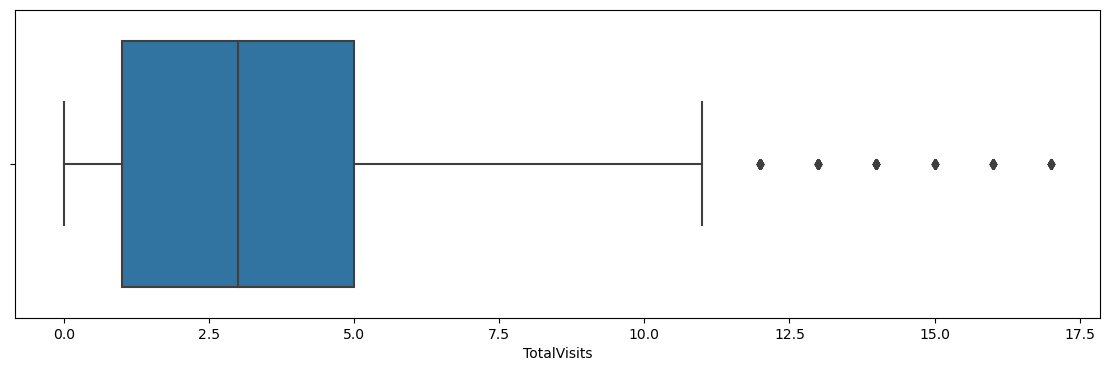

In [682]:
#Again checking outliers for TotalVisits
plt.figure(figsize=[14,4])
sns.boxplot(data=leads_df,x="TotalVisits")
plt.show()

we still find some outliers but it can be manage later

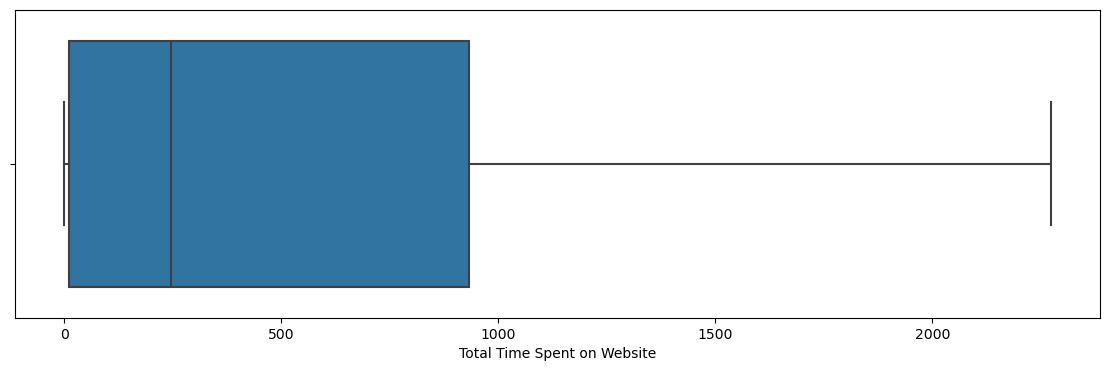

In [683]:
#Finding outliers for Total Time Spent on Website
plt.figure(figsize=[14,4])
sns.boxplot(data=leads_df,x="Total Time Spent on Website")
plt.show()

In [684]:
#this above column do not have any outliers but it has some skewness

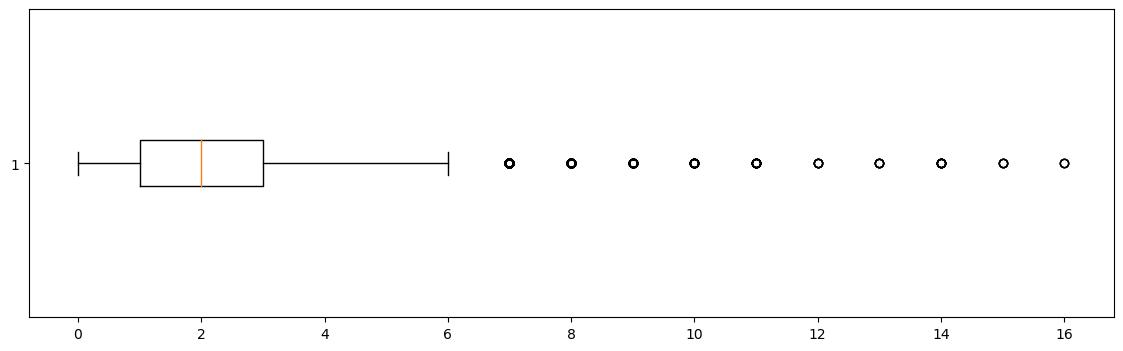

In [685]:
#finding outliers for page views per visit
plt.figure(figsize=[14,4])
plt.boxplot(x="Page Views Per Visit",data=leads_df,vert=False)
plt.show()

In [686]:
#Finding quantile for page views per visit
leads_df["Page Views Per Visit"].quantile([0.01,0.02,0.03,0.05,0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.01    0.0
0.02    0.0
0.03    0.0
0.05    0.0
0.10    0.0
0.25    1.0
0.50    2.0
0.70    3.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [687]:
#from above we can say that 99th quantile of the data is under 9.Anything above 9 would be considered as outliers.

In [688]:
leads_df=leads_df[~(leads_df["Page Views Per Visit"]>9)]

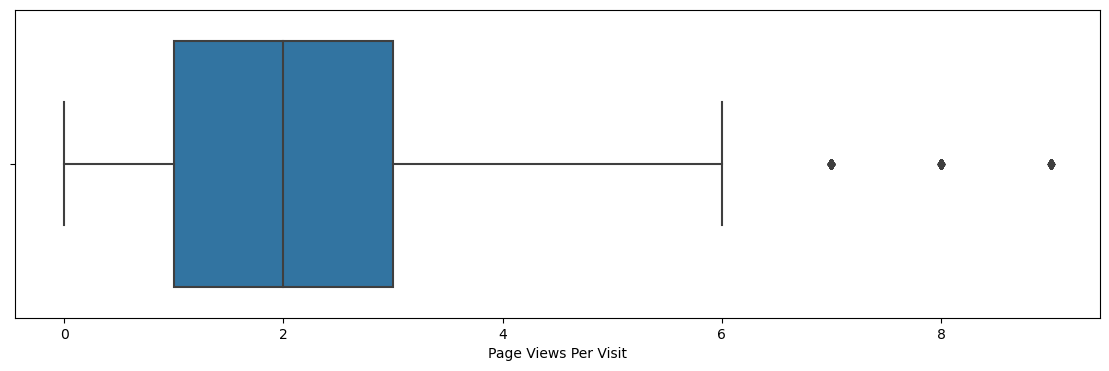

In [689]:
#Again checking outliers for page views per visit
plt.figure(figsize=[14,4])
sns.boxplot(x="Page Views Per Visit",data=leads_df)
plt.show()

In [690]:
leads_df.shape

(9090, 20)

In [691]:
#calculate percentage of rows retain after data cleaning and outliers removeable

In [692]:
orig_num_rows = 9240
rows_retain = 9090

percent_rows_retain = rows_retain / orig_num_rows *100

In [693]:
print(str(round(percent_rows_retain)) + "%")

98%


### Now performing UNIVARIATE/BIVARIATE analysis of our target variable with other categorical variables.

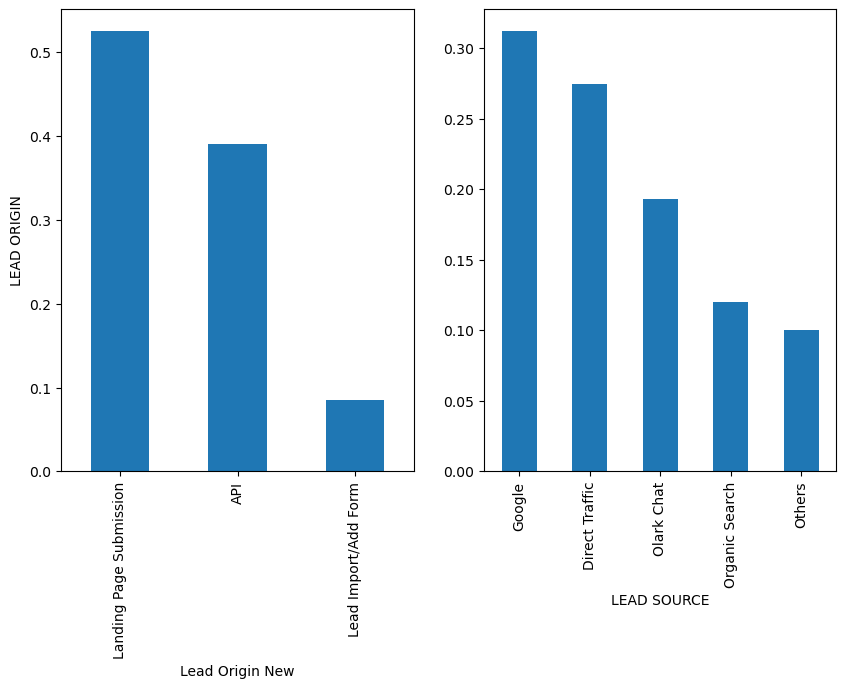

In [694]:
#plot the bar graph of percentage INCOME_GROUP categories in app_data_delay AND app_data_ontime
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
leads_df["Lead Origin New"].value_counts(normalize=True).plot.bar()
plt.ylabel("LEAD ORIGIN")
plt.subplot(1,2,2)
leads_df["Lead Source New"].value_counts(normalize=True).plot.bar()
plt.xlabel("LEAD SOURCE")
plt.show()

### Bivariate and Multivariate Analysis

#### Numeric- numeric analysis 

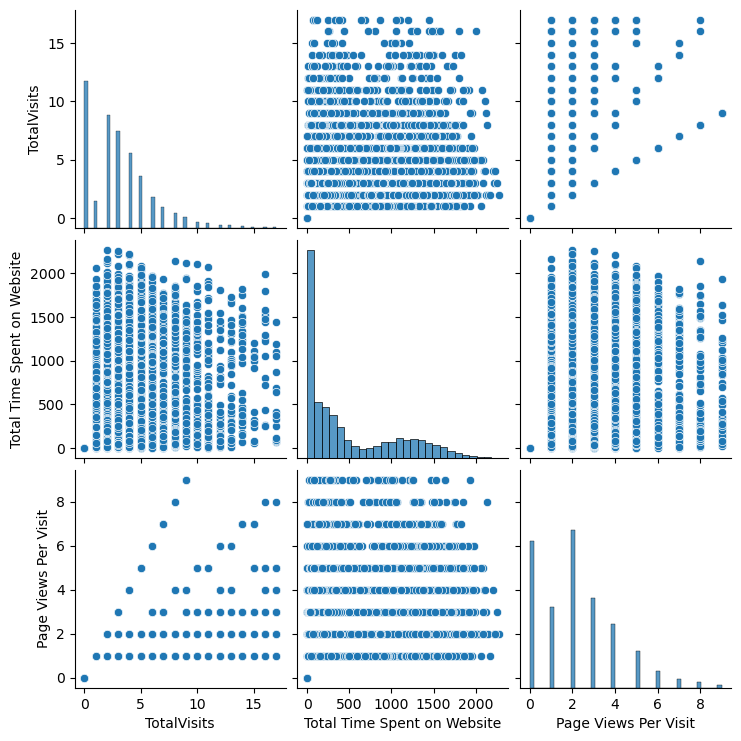

In [695]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=leads_df,vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"])

From above pair plot we are not able to find any conclusive pattern between "TotalVisits","Total Time Spent on Website","Page Views Per Visit".

#### Numerical categorical variable analysis

##### TotalVisits vs Converted

In [696]:
#groupby the Converted to find the mean of the Totalvisits with response 0 & 1 seperatly.
leads_df.groupby("Converted")["TotalVisits"].mean()

Converted
0    3.042181
1    3.298999
Name: TotalVisits, dtype: float64

In [697]:
#groupby the Converted to find the median of the Totalvisits with response 0 & 1 seperatly.
leads_df.groupby("Converted")["TotalVisits"].median()

Converted
0    3.0
1    3.0
Name: TotalVisits, dtype: float64

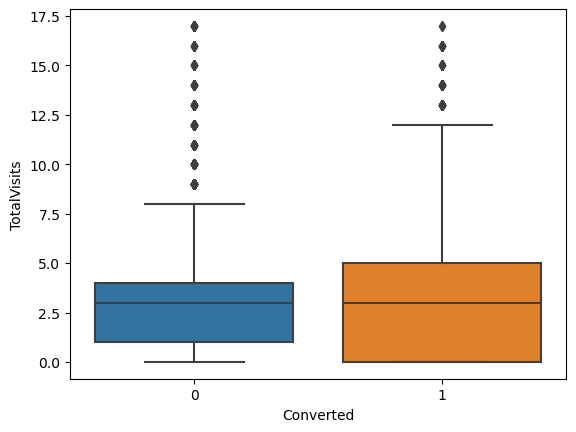

In [698]:
#plot the box plot of TotalVisits for yes & no responses.
sns.boxplot(data=leads_df,x="Converted",y="TotalVisits")
plt.show()

From above box plot of TotalVisits vs Converted we can see that mean is almost same for both converted and not converted.
However, those who were converted have more number range of total visits. It could be one of the key factors in conversion of leads

##### Total Time Spent on Website  vs Converted

In [699]:
#groupby the Converted to find the mean of the Total Time Spent on Website with response 0 & 1 seperatly.
leads_df.groupby("Converted")["Total Time Spent on Website"].mean()

Converted
0    328.416979
1    733.700429
Name: Total Time Spent on Website, dtype: float64

In [700]:
#groupby the Converted to find the median of the Total Time Spent on Website with response 0 & 1 seperatly.
leads_df.groupby("Converted")["Total Time Spent on Website"].median()

Converted
0    177.0
1    829.0
Name: Total Time Spent on Website, dtype: float64

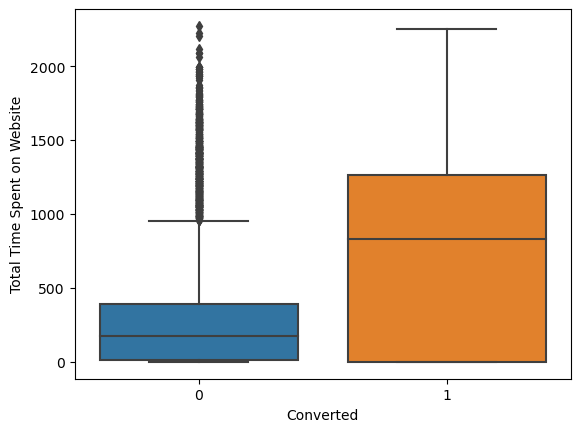

In [701]:
#plot the box plot of Total Time Spent on Website for yes & no responses.
sns.boxplot(data=leads_df,x="Converted",y="Total Time Spent on Website")
plt.show()

From above box plot of Total Time Spent on Website vs Converted we can clearly see that those who spent more time on website have higher percentage of conversion rate.

Definitely we can say if a leads spends moretime on website then higher chances of him to get converted

##### Page Views Per Visit  vs Converted 

In [702]:
#groupby the Converted to find the mean of the Total Time Spent on Website with response 0 & 1 seperatly.
leads_df.groupby("Converted")["Page Views Per Visit"].mean()

Converted
0    2.212869
1    2.171388
Name: Page Views Per Visit, dtype: float64

In [703]:
#groupby the Converted to find the median of the Total Time Spent on Website with response 0 & 1 seperatly.
leads_df.groupby("Converted")["Page Views Per Visit"].median()

Converted
0    2.0
1    2.0
Name: Page Views Per Visit, dtype: float64

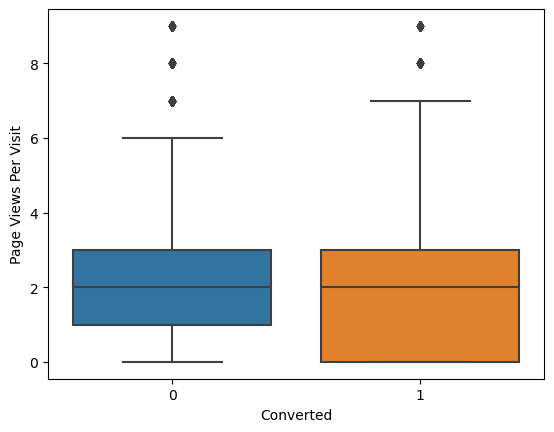

In [704]:
#plot the box plot of Total Time Spent on Website for yes & no responses.
sns.boxplot(data=leads_df,x="Converted",y="Page Views Per Visit")
plt.show()

From above box plot of Page Views Per Visit vs Converted we can see that mean is almost same for both converted and not converted.

We are not able to conclude anything from above plot though we can see converted category covers more ranges of pages views per visit

##### Categorical vs Categorical

In [705]:
#calculate the mean of Converted with different Lead Origins.
leads_df.groupby(["Lead Origin New","Converted"])["Converted"].count()/leads_df.groupby("Lead Origin New")["Lead Origin New"].count()*100

Lead Origin New          Converted
API                      0            68.996618
                         1            31.003382
Landing Page Submission  0            63.975676
                         1            36.024324
Lead Import/Add Form     0            12.419146
                         1            87.580854
dtype: float64

From above stats we can see the customers who got identified as a lead from origin Lead Import/Add Form(Lead Add Form,Lead Import,Quick Add Form) have higher chances of getting converted successfully.

Also, X education should focus on how they can increase the number of customers comes from Lead Import/Add Form , so that conversion rate would be increased.

In [706]:
#calculate the mean of Converted with different Lead Sources.
leads_df.groupby(["Lead Source New","Converted"])["Converted"].count()/leads_df.groupby("Lead Source New")["Lead Source New"].count()*100

Lead Source New  Converted
Direct Traffic   0            67.787115
                 1            32.212885
Google           0            60.084626
                 1            39.915374
Olark Chat       0            74.500856
                 1            25.499144
Organic Search   0            63.186813
                 1            36.813187
Others           0            22.087912
                 1            77.912088
dtype: float64

In [707]:
leads_df.groupby(["Lead Source New","Converted"])["Converted"].count()

Lead Source New  Converted
Direct Traffic   0            1694
                 1             805
Google           0            1704
                 1            1132
Olark Chat       0            1306
                 1             447
Organic Search   0             690
                 1             402
Others           0             201
                 1             709
Name: Converted, dtype: int64

From above stats we can see that customers whose source is Others they have higher rate of conversion in a lead. However,the number of customers from these source are very less. X education should develop marketing strategies on these platforms so that customer counts should get increased .

##### Next we are plotting the bar plot of target variable `Converted` with all binomial attibutes

In [708]:
binomial_columns =["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Get updates on DM Content","Update me on Supply Chain Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]

for x in binomial_columns:
    print("\'"+ x + "\'" + " with mean value of Converted 0 being No 1 being Yes ")    
    print(leads_df.groupby([x,"Converted"])["Converted"].count() /leads_df.groupby(x)[x].count()*100    )
    print(leads_df.groupby([x,"Converted"])["Converted"].count() )
    print("----------------------------------------------------------------------------")

'Do Not Email' with mean value of Converted 0 being No 1 being Yes 
Do Not Email  Converted
No            0            59.668376
              1            40.331624
Yes           0            83.875530
              1            16.124470
dtype: float64
Do Not Email  Converted
No            0            5002
              1            3381
Yes           0             593
              1             114
Name: Converted, dtype: int64
----------------------------------------------------------------------------
'Do Not Call' with mean value of Converted 0 being No 1 being Yes 
Do Not Call  Converted
No           0             61.564701
             1             38.435299
Yes          1            100.000000
dtype: float64
Do Not Call  Converted
No           0            5595
             1            3493
Yes          1               2
Name: Converted, dtype: int64
----------------------------------------------------------------------------
'Search' with mean value of Converted 0 being N

# Data Preperaton for model building

#### Converting some binary variables (No/Yes) to 0/1

In [709]:
leads_df[["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Get updates on DM Content","Update me on Supply Chain Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]]

Do Not Email Do Not Call Search Newspaper Article X Education Forums  \
0              No          No     No                No                 No   
1              No          No     No                No                 No   
2              No          No     No                No                 No   
3              No          No     No                No                 No   
4              No          No     No                No                 No   
...           ...         ...    ...               ...                ...   
9235          Yes          No     No                No                 No   
9236           No          No     No                No                 No   
9237          Yes          No     No                No                 No   
9238           No          No     No                No                 No   
9239           No          No     No                No                 No   

     Newspaper Digital Advertisement Through Recommendations  \
0           No                    No                      No   
1           No                    No                      No   
2           No                    No                      No   
3           No                    No                      No   
4           No                    No                      No   
...        ...                   ...                     ...   
9235        No                    No                      No   
9236        No                    No                      No   
9237        No                    No                      No   
9238        No                    No                      No   
9239        No                    No                      No   

     Get updates on DM Content Update me on Supply Chain Content  \
0                           No                                No   
1                           No                                No   
2                           No                                No   
3                           No                                No   
4                           No                                No   
...                        ...                               ...   
9235                        No                                No   
9236                        No                                No   
9237                        No                                No   
9238                        No                                No   
9239                        No                                No   

     I agree to pay the amount through cheque  \
0                                          No   
1                                          No   
2                                          No   
3                                          No   
4                                          No   
...                                       ...   
9235                                       No   
9236                                       No   
9237                                       No   
9238                                       No   
9239                                       No   

     A free copy of Mastering The Interview  
0                                        No  
1                                        No  
2                                       Yes  
3                                        No  
4                                        No  
...                                     ...  
9235                                     No  
9236                                    Yes  
9237                                    Yes  
9238                                     No  
9239                                    Yes  

[9090 rows x 12 columns]

In [710]:
#Update "Do Not Email" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Do Not Email"]=leads_df["Do Not Email"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Do Not Call" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Do Not Call"]=leads_df["Do Not Call"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Search" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Search"]=leads_df["Search"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Newspaper Article" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Newspaper Article"]=leads_df["Newspaper Article"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "X Education Forums" of numerical data type where response "yes"= 1, "no"= 0
leads_df["X Education Forums"]=leads_df["X Education Forums"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Newspaper" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Newspaper"]=leads_df["Newspaper"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Digital Advertisement" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Digital Advertisement"]=leads_df["Digital Advertisement"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Through Recommendations"]=leads_df["Through Recommendations"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Update me on Supply Chain Content"]=leads_df["Update me on Supply Chain Content"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_df["Get updates on DM Content"]=leads_df["Get updates on DM Content"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_df["I agree to pay the amount through cheque"]=leads_df["I agree to pay the amount through cheque"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_df["A free copy of Mastering The Interview"]=leads_df["A free copy of Mastering The Interview"].apply(lambda x : 1 if x =="Yes" else 0)


In [711]:
leads_df[["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Get updates on DM Content","Update me on Supply Chain Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]]

Do Not Email  Do Not Call  Search  Newspaper Article  \
0                0            0       0                  0   
1                0            0       0                  0   
2                0            0       0                  0   
3                0            0       0                  0   
4                0            0       0                  0   
...            ...          ...     ...                ...   
9235             1            0       0                  0   
9236             0            0       0                  0   
9237             1            0       0                  0   
9238             0            0       0                  0   
9239             0            0       0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
0                      0          0                      0   
1                      0          0                      0   
2                      0          0                      0   
3                      0          0                      0   
4                      0          0                      0   
...                  ...        ...                    ...   
9235                   0          0                      0   
9236                   0          0                      0   
9237                   0          0                      0   
9238                   0          0                      0   
9239                   0          0                      0   

      Through Recommendations  Get updates on DM Content  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
9235                        0                          0   
9236                        0                          0   
9237                        0                          0   
9238                        0                          0   
9239                        0                          0   

      Update me on Supply Chain Content  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
9235                                  0   
9236                                  0   
9237                                  0   
9238                                  0   
9239                                  0   

      I agree to pay the amount through cheque  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
9235                                         0   
9236                                         0   
9237                                         0   
9238                                         0   
9239                                         0   

      A free copy of Mastering The Interview  
0                                          0  
1                                          0  
2                                          1  
3                                          0  
4                                          0  
...                                      ...  
9235                                       0  
9236                                       1  
9237                                       1  
9238                                       0  
9239                                       1  

[9090 rows x 12 columns]

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [712]:
# Creating dummy variables for the variable 'Lead Origin'
LeadOrigin = pd.get_dummies(leads_df['Lead Origin New'], prefix='Lead_Origin',drop_first=True)
leads_df = pd.concat([leads_df,LeadOrigin], axis=1)

# Creating dummy variables for the variable 'Lead Origin'
LeadSource = pd.get_dummies(leads_df['Lead Source New'], prefix='Lead_Source',drop_first=True)
leads_df = pd.concat([leads_df,LeadSource], axis=1)

leads_df.head()

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0            0                            0   
1            0          0            5                          674   
2            0          1            2                         1532   
3            0          0            1                          305   
4            0          1            2                         1428   

   Page Views Per Visit  Search  Newspaper Article  ...  \
0                     0       0                  0  ...   
1                     2       0                  0  ...   
2                     2       0                  0  ...   
3                     1       0                  0  ...   
4                     1       0                  0  ...   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview          Lead Origin New  \
0                                       0                      API   
1                                       0                      API   
2                                       1  Landing Page Submission   
3                                       0  Landing Page Submission   
4                                       0  Landing Page Submission   

   Lead Source New  Lead_Origin_Landing Page Submission  \
0       Olark Chat                                False   
1   Organic Search                                False   
2   Direct Traffic                                 True   
3   Direct Traffic                                 True   
4           Google                                 True   

   Lead_Origin_Lead Import/Add Form  Lead_Source_Google  \
0                             False               False   
1                             False               False   
2                             False               False   
3                             False               False   
4                             False                True   

   Lead_Source_Olark Chat Lead_Source_Organic Search Lead_Source_Others  
0                    True                      False              False  
1                   False                       True              False  
2                   False                      False              False  
3                   False                      False              False  
4                   False                      False              False  

[5 rows x 26 columns]

In [744]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop(columns={"Lead Origin New","Lead Source New"}, axis=1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9090 non-null   object
 1   Lead Number                               9090 non-null   int64 
 2   Do Not Email                              9090 non-null   int64 
 3   Do Not Call                               9090 non-null   int64 
 4   Converted                                 9090 non-null   int64 
 5   TotalVisits                               9090 non-null   int64 
 6   Total Time Spent on Website               9090 non-null   int64 
 7   Page Views Per Visit                      9090 non-null   int64 
 8   Search                                    9090 non-null   int64 
 9   Newspaper Article                         9090 non-null   int64 
 10  X Education Forums                        9090 non-nu

In [745]:
leads_df.head()

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0            0                            0   
1            0          0            5                          674   
2            0          1            2                         1532   
3            0          0            1                          305   
4            0          1            2                         1428   

   Page Views Per Visit  Search  Newspaper Article  ...  \
0                     0       0                  0  ...   
1                     2       0                  0  ...   
2                     2       0                  0  ...   
3                     1       0                  0  ...   
4                     1       0                  0  ...   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Import/Add Form  \
0                                    0                                 0   
1                                    0                                 0   
2                                    1                                 0   
3                                    1                                 0   
4                                    1                                 0   

   Lead_Source_Google  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead_Source_Others  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 24 columns]

In [746]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [747]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9090 non-null   object
 1   Lead Number                               9090 non-null   int64 
 2   Do Not Email                              9090 non-null   int64 
 3   Do Not Call                               9090 non-null   int64 
 4   Converted                                 9090 non-null   int64 
 5   TotalVisits                               9090 non-null   int64 
 6   Total Time Spent on Website               9090 non-null   int64 
 7   Page Views Per Visit                      9090 non-null   int64 
 8   Search                                    9090 non-null   int64 
 9   Newspaper Article                         9090 non-null   int64 
 10  X Education Forums                        9090 non-nu

In [716]:
leads_df["Lead_Origin_Landing Page Submission"]=leads_df["Lead_Origin_Landing Page Submission"].astype('uint8')

In [717]:
leads_df["Lead_Origin_Lead Import/Add Form"]=leads_df["Lead_Origin_Lead Import/Add Form"].astype('uint8')

In [718]:
leads_df["Lead_Source_Google"]=leads_df["Lead_Source_Google"].astype('uint8')

In [719]:
leads_df["Lead_Source_Google"]=leads_df["Lead_Source_Google"].astype('uint8')

In [720]:
leads_df["Lead_Source_Olark Chat"]=leads_df["Lead_Source_Olark Chat"].astype('uint8')

In [721]:
leads_df["Lead_Source_Organic Search"]=leads_df["Lead_Source_Organic Search"].astype('uint8')

In [722]:
leads_df["Lead_Source_Others"]=leads_df["Lead_Source_Others"].astype('uint8')

In [748]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9090 non-null   object
 1   Lead Number                               9090 non-null   int64 
 2   Do Not Email                              9090 non-null   int64 
 3   Do Not Call                               9090 non-null   int64 
 4   Converted                                 9090 non-null   int64 
 5   TotalVisits                               9090 non-null   int64 
 6   Total Time Spent on Website               9090 non-null   int64 
 7   Page Views Per Visit                      9090 non-null   int64 
 8   Search                                    9090 non-null   int64 
 9   Newspaper Article                         9090 non-null   int64 
 10  X Education Forums                        9090 non-nu

In [724]:
leads_df.head()

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0            0                            0   
1            0          0            5                          674   
2            0          1            2                         1532   
3            0          0            1                          305   
4            0          1            2                         1428   

   Page Views Per Visit  Search  Newspaper Article  ...  \
0                     0       0                  0  ...   
1                     2       0                  0  ...   
2                     2       0                  0  ...   
3                     1       0                  0  ...   
4                     1       0                  0  ...   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview          Lead Origin New  \
0                                       0                      API   
1                                       0                      API   
2                                       1  Landing Page Submission   
3                                       0  Landing Page Submission   
4                                       0  Landing Page Submission   

   Lead Source New  Lead_Origin_Landing Page Submission  \
0       Olark Chat                                    0   
1   Organic Search                                    0   
2   Direct Traffic                                    1   
3   Direct Traffic                                    1   
4           Google                                    1   

   Lead_Origin_Lead Import/Add Form  Lead_Source_Google  \
0                                 0                   0   
1                                 0                   0   
2                                 0                   0   
3                                 0                   0   
4                                 0                   1   

   Lead_Source_Olark Chat Lead_Source_Organic Search Lead_Source_Others  
0                       1                          0                  0  
1                       0                          1                  0  
2                       0                          0                  0  
3                       0                          0                  0  
4                       0                          0                  0  

[5 rows x 26 columns]

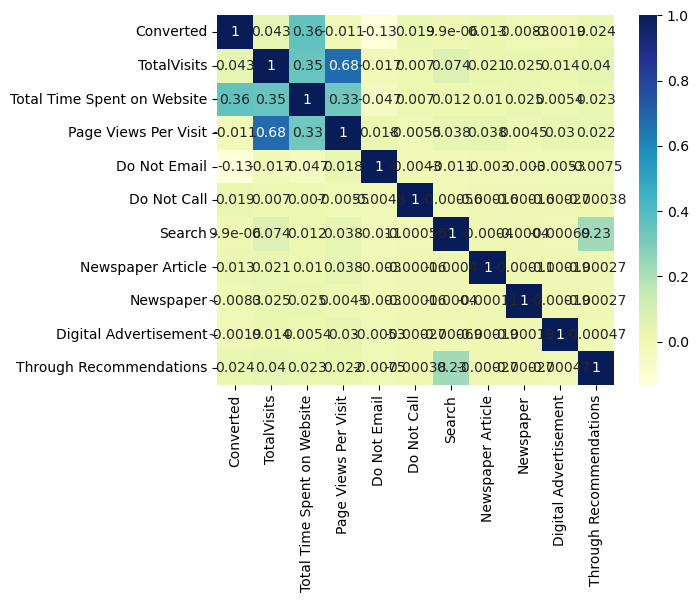

In [749]:
# Let's check the correlation coefficients to see which variables are highly correlated

sns.heatmap(leads_df[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit","Do Not Email","Do Not Call","Search","Newspaper Article","Newspaper","Digital Advertisement","Through Recommendations"]].corr(), annot = True, cmap="YlGnBu")
plt.show()

From above correaltion matrix we can see there is high collinearity between variables TotalVisits and Page Views Per Visit

## Test-Train Split

In [750]:
from sklearn.model_selection import train_test_split

In [751]:
# Putting feature variable to X
X = leads_df.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0            0                            0   
1             0            0            5                          674   
2             0            0            2                         1532   
3             0            0            1                          305   
4             0            0            2                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                     0       0                  0                   0   
1                     2       0                  0                   0   
2                     2       0                  0                   0   
3                     1       0                  0                   0   
4                     1       0                  0                   0   

   Newspaper  Digital Advertisement  ...  Update me on Supply Chain Content  \
0          0                      0  ...                                  0   
1          0                      0  ...                                  0   
2          0                      0  ...                                  0   
3          0                      0  ...                                  0   
4          0                      0  ...                                  0   

   Get updates on DM Content  I agree to pay the amount through cheque  \
0                          0                                         0   
1                          0                                         0   
2                          0                                         0   
3                          0                                         0   
4                          0                                         0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Import/Add Form  \
0                                    0                                 0   
1                                    0                                 0   
2                                    1                                 0   
3                                    1                                 0   
4                                    1                                 0   

   Lead_Source_Google  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead_Source_Others  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 21 columns]

In [752]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [753]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [754]:
from sklearn.preprocessing import MinMaxScaler

In [755]:
#Scaling done for Continuous variable
scaler = MinMaxScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
302              0            0     0.411765                     0.110035   
6087             1            0     0.000000                     0.000000   
1033             0            0     0.294118                     0.206866   
7656             1            0     0.352941                     0.154930   
3241             0            0     0.235294                     0.428257   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
302               0.222222       0                  0                   0   
6087              0.000000       0                  0                   0   
1033              0.555556       0                  0                   0   
7656              0.666667       0                  0                   0   
3241              0.111111       0                  0                   0   

      Newspaper  Digital Advertisement  ...  \
302           0                      0  ...   
6087          0                      0  ...   
1033          0                      0  ...   
7656          0                      0  ...   
3241          0                      0  ...   

      Update me on Supply Chain Content  Get updates on DM Content  \
302                                   0                          0   
6087                                  0                          0   
1033                                  0                          0   
7656                                  0                          0   
3241                                  0                          0   

      I agree to pay the amount through cheque  \
302                                          0   
6087                                         0   
1033                                         0   
7656                                         0   
3241                                         0   

      A free copy of Mastering The Interview  \
302                                        0   
6087                                       0   
1033                                       0   
7656                                       1   
3241                                       1   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Import/Add Form  \
302                                     0                                 0   
6087                                    0                                 0   
1033                                    0                                 0   
7656                                    1                                 0   
3241                                    1                                 0   

      Lead_Source_Google  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
302                    0                       0                           0   
6087                   0                       1                           0   
1033                   1                       0                           0   
7656                   0                       0                           0   
3241                   0                       0                           0   

      Lead_Source_Others  
302                    1  
6087                   0  
1033                   0  
7656                   0  
3241                   0  

[5 rows x 21 columns]

## Model Building using Sklearn

In [756]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [757]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [734]:
logreg = LogisticRegression()

In [758]:
# running RFE with 18 variables as output
rfe = RFE(logreg)            

In [740]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9090 non-null   object
 1   Lead Number                               9090 non-null   int64 
 2   Do Not Email                              9090 non-null   int64 
 3   Do Not Call                               9090 non-null   int64 
 4   Converted                                 9090 non-null   int64 
 5   TotalVisits                               9090 non-null   int64 
 6   Total Time Spent on Website               9090 non-null   int64 
 7   Page Views Per Visit                      9090 non-null   int64 
 8   Search                                    9090 non-null   int64 
 9   Newspaper Article                         9090 non-null   int64 
 10  X Education Forums                        9090 non-nu

In [759]:

# Proceed with your model fitting
rfe = rfe.fit(X_train,y_train)

In [760]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True, False, False])

In [761]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 8),
 ('Newspaper Article', True, 1),
 ('X Education Forums', False, 12),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 6),
 ('Through Recommendations', True, 1),
 ('Update me on Supply Chain Content', False, 11),
 ('Get updates on DM Content', False, 10),
 ('I agree to pay the amount through cheque', False, 9),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead_Origin_Landing Page Submission', False, 3),
 ('Lead_Origin_Lead Import/Add Form', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 5),
 ('Lead_Source_Others', False, 2)]

In [762]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Newspaper Article', 'Newspaper',
       'Through Recommendations', 'Lead_Origin_Lead Import/Add Form',
       'Lead_Source_Google', 'Lead_Source_Olark Chat'],
      dtype='object')

In [763]:
cols=X_train.columns[~rfe.support_]

In [764]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3242.4
Date:                Sun, 23 Feb 2025   Deviance:                       6484.8
Time:                        18:24:04   Pearson chi2:                 6.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2669
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2112      0.088    -25.081      0.000      -2.384      -2.038
Do Not Email                        -1.2478      0.147     -8.464      0.000      -1.537      -0.959
Do Not Call                         20.9079    3.4e+04      0.001      1.000   -6.66e+04    6.67e+04
TotalVisits                          1.0176      0.219      4.637      0.000       0.588       1.448
Total Time Spent on Website          4.5274      0.152     29.726      0.000       4.229       4.826
Newspaper Article                   22.2359   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Newspaper                          -24.5642   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Through Recommendations             21.8814   2.64e+04      0.001      0.999   -5.17e+04    5.18e+04
Lead_Origin_Lead Import/Add Form     4.0192      0.158     25.389      0.000       3.709       4.329
Lead_Source_Google                   0.2407      0.071      3.378      0.001       0.101       0.380
Lead_Source_Olark Chat               0.9772      0.108      9.023      0.000       0.765       1.189
====================================================================================================
"""

In [766]:
col=col.drop("Do Not Call",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Newspaper Article', 'Newspaper', 'Through Recommendations',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat'],
      dtype='object')

In [767]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3242.8
Date:                Sun, 23 Feb 2025   Deviance:                       6485.5
Time:                        18:24:54   Pearson chi2:                 6.87e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2669
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2122      0.088    -25.096      0.000      -2.385      -2.039
Do Not Email                        -1.2483      0.147     -8.466      0.000      -1.537      -0.959
TotalVisits                          1.0199      0.219      4.648      0.000       0.590       1.450
Total Time Spent on Website          4.5287      0.152     29.736      0.000       4.230       4.827
Newspaper Article                   21.2351   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Newspaper                          -23.5656   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations             20.8805    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
Lead_Origin_Lead Import/Add Form     4.0227      0.158     25.415      0.000       3.712       4.333
Lead_Source_Google                   0.2412      0.071      3.386      0.001       0.102       0.381
Lead_Source_Olark Chat               0.9781      0.108      9.032      0.000       0.766       1.190
====================================================================================================
"""

In [769]:
col=col.drop("Newspaper Article",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Newspaper', 'Through Recommendations',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat'],
      dtype='object')

In [770]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3243.3
Date:                Sun, 23 Feb 2025   Deviance:                       6486.6
Time:                        18:25:08   Pearson chi2:                 6.87e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2667
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2129      0.088    -25.103      0.000      -2.386      -2.040
Do Not Email                        -1.2488      0.147     -8.469      0.000      -1.538      -0.960
TotalVisits                          1.0253      0.219      4.674      0.000       0.595       1.455
Total Time Spent on Website          4.5299      0.152     29.742      0.000       4.231       4.828
Newspaper                          -23.5689   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations             20.8784    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
Lead_Origin_Lead Import/Add Form     4.0234      0.158     25.418      0.000       3.713       4.334
Lead_Source_Google                   0.2403      0.071      3.374      0.001       0.101       0.380
Lead_Source_Olark Chat               0.9788      0.108      9.037      0.000       0.766       1.191
====================================================================================================
"""

In [772]:
col=col.drop("Newspaper",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead_Origin_Lead Import/Add Form',
       'Lead_Source_Google', 'Lead_Source_Olark Chat'],
      dtype='object')

In [773]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3245.4
Date:                Sun, 23 Feb 2025   Deviance:                       6490.9
Time:                        18:25:25   Pearson chi2:                 6.87e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2662
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2086      0.088    -25.077      0.000      -2.381      -2.036
Do Not Email                        -1.2474      0.147     -8.463      0.000      -1.536      -0.959
TotalVisits                          1.0119      0.219      4.617      0.000       0.582       1.441
Total Time Spent on Website          4.5203      0.152     29.712      0.000       4.222       4.818
Through Recommendations             20.8845    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
Lead_Origin_Lead Import/Add Form     4.0192      0.158     25.401      0.000       3.709       4.329
Lead_Source_Google                   0.2421      0.071      3.400      0.001       0.103       0.382
Lead_Source_Olark Chat               0.9749      0.108      9.007      0.000       0.763       1.187
====================================================================================================
"""

In [775]:
col=col.drop("Through Recommendations",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat'],
      dtype='object')

In [776]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.7
Date:                Sun, 23 Feb 2025   Deviance:                       6493.4
Time:                        18:25:36   Pearson chi2:                 6.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2659
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2105      0.088    -25.100      0.000      -2.383      -2.038
Do Not Email                        -1.2486      0.147     -8.470      0.000      -1.538      -0.960
TotalVisits                          1.0217      0.219      4.664      0.000       0.592       1.451
Total Time Spent on Website          4.5240      0.152     29.738      0.000       4.226       4.822
Lead_Origin_Lead Import/Add Form     4.0211      0.158     25.411      0.000       3.711       4.331
Lead_Source_Google                   0.2411      0.071      3.388      0.001       0.102       0.381
Lead_Source_Olark Chat               0.9765      0.108      9.022      0.000       0.764       1.189
====================================================================================================
"""

In [778]:
cols=cols.drop("I agree to pay the amount through cheque",1)
cols

Index(['Page Views Per Visit', 'Search', 'X Education Forums',
       'Digital Advertisement', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [779]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.7
Date:                Sun, 23 Feb 2025   Deviance:                       6493.4
Time:                        18:26:01   Pearson chi2:                 6.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2659
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2105      0.088    -25.100      0.000      -2.383      -2.038
Do Not Email                        -1.2486      0.147     -8.470      0.000      -1.538      -0.960
TotalVisits                          1.0217      0.219      4.664      0.000       0.592       1.451
Total Time Spent on Website          4.5240      0.152     29.738      0.000       4.226       4.822
Lead_Origin_Lead Import/Add Form     4.0211      0.158     25.411      0.000       3.711       4.331
Lead_Source_Google                   0.2411      0.071      3.388      0.001       0.102       0.381
Lead_Source_Olark Chat               0.9765      0.108      9.022      0.000       0.764       1.189
====================================================================================================
"""

In [780]:
cols=cols.drop("Search",1)
cols

Index(['Page Views Per Visit', 'X Education Forums', 'Digital Advertisement',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [781]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.7
Date:                Sun, 23 Feb 2025   Deviance:                       6493.4
Time:                        18:26:06   Pearson chi2:                 6.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2659
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2105      0.088    -25.100      0.000      -2.383      -2.038
Do Not Email                        -1.2486      0.147     -8.470      0.000      -1.538      -0.960
TotalVisits                          1.0217      0.219      4.664      0.000       0.592       1.451
Total Time Spent on Website          4.5240      0.152     29.738      0.000       4.226       4.822
Lead_Origin_Lead Import/Add Form     4.0211      0.158     25.411      0.000       3.711       4.331
Lead_Source_Google                   0.2411      0.071      3.388      0.001       0.102       0.381
Lead_Source_Olark Chat               0.9765      0.108      9.022      0.000       0.764       1.189
====================================================================================================
"""

In [784]:
cols=cols.drop("Page Views Per Visit",1)
cols

Index(['X Education Forums', 'Digital Advertisement',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [785]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.7
Date:                Sun, 23 Feb 2025   Deviance:                       6493.4
Time:                        18:26:27   Pearson chi2:                 6.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2659
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2105      0.088    -25.100      0.000      -2.383      -2.038
Do Not Email                        -1.2486      0.147     -8.470      0.000      -1.538      -0.960
TotalVisits                          1.0217      0.219      4.664      0.000       0.592       1.451
Total Time Spent on Website          4.5240      0.152     29.738      0.000       4.226       4.822
Lead_Origin_Lead Import/Add Form     4.0211      0.158     25.411      0.000       3.711       4.331
Lead_Source_Google                   0.2411      0.071      3.388      0.001       0.102       0.381
Lead_Source_Olark Chat               0.9765      0.108      9.022      0.000       0.764       1.189
====================================================================================================
"""

In [787]:
cols=cols.drop("A free copy of Mastering The Interview",1)
cols

Index(['X Education Forums', 'Digital Advertisement',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [788]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.7
Date:                Sun, 23 Feb 2025   Deviance:                       6493.4
Time:                        18:26:44   Pearson chi2:                 6.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2659
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2105      0.088    -25.100      0.000      -2.383      -2.038
Do Not Email                        -1.2486      0.147     -8.470      0.000      -1.538      -0.960
TotalVisits                          1.0217      0.219      4.664      0.000       0.592       1.451
Total Time Spent on Website          4.5240      0.152     29.738      0.000       4.226       4.822
Lead_Origin_Lead Import/Add Form     4.0211      0.158     25.411      0.000       3.711       4.331
Lead_Source_Google                   0.2411      0.071      3.388      0.001       0.102       0.381
Lead_Source_Olark Chat               0.9765      0.108      9.022      0.000       0.764       1.189
====================================================================================================
"""

In [790]:
cols=cols.drop("Lead_Source_Others",1)
cols

Index(['X Education Forums', 'Digital Advertisement',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead_Origin_Landing Page Submission', 'Lead_Source_Organic Search'],
      dtype='object')

In [791]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.7
Date:                Sun, 23 Feb 2025   Deviance:                       6493.4
Time:                        18:27:00   Pearson chi2:                 6.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2659
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2105      0.088    -25.100      0.000      -2.383      -2.038
Do Not Email                        -1.2486      0.147     -8.470      0.000      -1.538      -0.960
TotalVisits                          1.0217      0.219      4.664      0.000       0.592       1.451
Total Time Spent on Website          4.5240      0.152     29.738      0.000       4.226       4.822
Lead_Origin_Lead Import/Add Form     4.0211      0.158     25.411      0.000       3.711       4.331
Lead_Source_Google                   0.2411      0.071      3.388      0.001       0.102       0.381
Lead_Source_Olark Chat               0.9765      0.108      9.022      0.000       0.764       1.189
====================================================================================================
"""

### Checking VIFs

In [792]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [793]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                       TotalVisits  2.02
2       Total Time Spent on Website  1.90
4                Lead_Source_Google  1.49
0                      Do Not Email  1.05
3  Lead_Origin_Lead Import/Add Form  1.01
5            Lead_Source_Olark Chat  1.01

In [794]:
col=col.drop("Lead_Source_Organic Search",1)
col

KeyError: "['Lead_Source_Organic Search'] not found in axis"

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

From above we can see `Lead_Origin_Landing Page Submission` has high p-value . So we will be droppping that column.

In [ ]:
col=col.drop("Lead_Origin_Landing Page Submission",1)
col

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

We can seen there is no significant collinearity among the final list of features.

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

#### Matrix evaulation on train set

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

### Matrix beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Precision and Recall

In [ ]:
#Looking at the confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion3

##### Precision
TP / TP + FP

In [ ]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

 ## Step 6 - Model prediction and evaluation on test set

In [ ]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [795]:
y_test_pred[:10]

6906    0.726386
1873    0.176397
771     0.182202
4495    0.182486
9061    0.795895
4929    0.726200
2308    0.194596
1034    0.131850
9033    0.139105
7008    0.729306
dtype: float64

In [796]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [797]:
# Let's see the head
y_pred_1.head()

0
6906  0.726386
1873  0.176397
771   0.182202
4495  0.182486
9061  0.795895

In [798]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
6906          1
1873          0
771           0
4495          0
9061          1

In [799]:
# Putting LeadNumber to index
y_test_df['LeadNumber'] = y_test_df.index

In [800]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [801]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [802]:
y_pred_final.head()

Converted  LeadNumber         0
0          1        6906  0.726386
1          0        1873  0.176397
2          0         771  0.182202
3          0        4495  0.182486
4          1        9061  0.795895

In [803]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [804]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadNumber','Converted','Converted_Prob'], axis=1)

In [805]:
# Let's see the head of y_pred_final
y_pred_final.head()

LeadNumber  Converted  Converted_Prob
0        6906          1        0.726386
1        1873          0        0.176397
2         771          0        0.182202
3        4495          0        0.182486
4        9061          1        0.795895

In [806]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [807]:
y_pred_final.head()

LeadNumber  Converted  Converted_Prob  final_predicted
0        6906          1        0.726386                1
1        1873          0        0.176397                0
2         771          0        0.182202                0
3        4495          0        0.182486                0
4        9061          1        0.795895                1

In [808]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7792445911257793

In [809]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1363,  297],
       [ 305,  762]], dtype=int64)

In [810]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [811]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7141518275538894

In [812]:
# Let us calculate specificity
TN / float(TN+FP)

0.8210843373493976

### Calculating Lead score on test data set

In [813]:
y_pred_final["LeadScore"]=y_pred_final.Converted_Prob.apply(lambda x: round(x*100,2) )
y_pred_final.head(10)

LeadNumber  Converted  Converted_Prob  final_predicted  LeadScore
0        6906          1        0.726386                1      72.64
1        1873          0        0.176397                0      17.64
2         771          0        0.182202                0      18.22
3        4495          0        0.182486                0      18.25
4        9061          1        0.795895                1      79.59
5        4929          1        0.726200                1      72.62
6        2308          0        0.194596                0      19.46
7        1034          0        0.131850                0      13.18
8        9033          0        0.139105                0      13.91
9        7008          1        0.729306                1      72.93